In [1]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
cifgar10 = tf.keras.datasets.cifar10

(X_train, y_train), (x_test, y_test) = cifgar10.load_data()

In [3]:
y_train = y_train.flatten()
y_test = y_test.flatten()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[[Text(0, 0, 'airplane'),
  Text(0, 0, 'automobile'),
  Text(0, 0, 'bird'),
  Text(0, 0, 'cat'),
  Text(0, 0, 'deer'),
  Text(0, 0, 'dog'),
  Text(0, 0, 'frog'),
  Text(0, 0, 'horse'),
  Text(0, 0, 'ship'),
  Text(0, 0, 'truck')]]

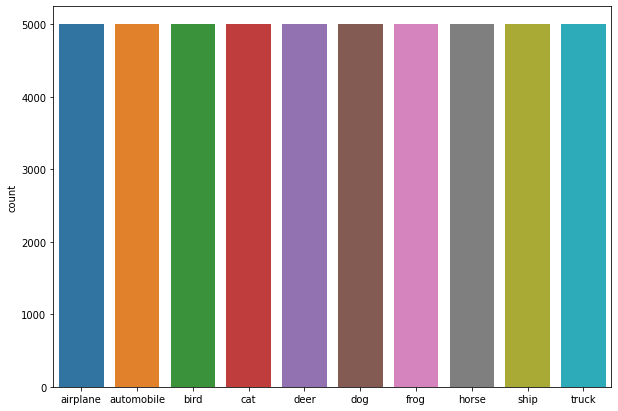

In [4]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,7))
p = sns.countplot(y_train.flatten())
p.set(xticklabels = classes)

Normalising and reshaping

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_train.shape[0]

50000

In [7]:
input_shape=(32,32,3)

X_train = X_train.reshape(50000, 32,32,3)

X_train = X_train/255.0

X_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2],3)

X_test = x_test/255.0

In [8]:
X_train.shape

(50000, 32, 32, 3)

In [9]:
X_test.shape

(10000, 32, 32, 3)

In [10]:
y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)


In [11]:
y_train[0]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)>

tf.Tensor([0. 0. 0. 0. 1. 0. 0. 0. 0. 0.], shape=(10,), dtype=float32)


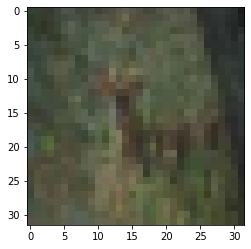

In [12]:
plt.imshow(X_train[10])
print(y_train[10])

In [13]:
batch_size = 32
num_classes = 10
epochs = 50

In [14]:
from tensorflow.keras import Sequential, layers

In [15]:
conv_layers = [
    layers.Conv2D(64, kernel_size = [3,3], padding = 'same', activation = tf.nn.relu),
    layers.Conv2D(64, kernel_size = [3,3], padding = 'same', activation = tf.nn.relu),
    layers.MaxPool2D(pool_size = [2,2], strides = 2, padding = 'same'),
    # Conv-Conv-Pooling unit 2, output channel increases to 128, half width and height
    layers.Conv2D(128, kernel_size=[3,3], padding='same', activation=tf.nn.relu),
    layers.Conv2D(128, kernel_size=[3,3], padding='same', activation=tf.nn.relu),
    layers.MaxPool2D(pool_size = [2,2], strides = 2, padding = 'same'),
    # Conv-Conv-Pooling unit 3, output channel increases to 256,half width and height
    layers.Conv2D(256, kernel_size=[3,3], padding='same', activation=tf.nn.relu),
    layers.Conv2D(256, kernel_size=[3,3], padding='same', activation=tf.nn.relu),
    layers.MaxPool2D(pool_size = [2,2], strides = 2, padding = 'same'),
    # Conv-Conv-Pooling unit 4, output channel increases to 512, half width and height
    layers.Conv2D(512, kernel_size=[3,3], padding='same', activation=tf.nn.relu),
    layers.Conv2D(512, kernel_size=[3,3], padding='same', activation=tf.nn.relu),
    layers.MaxPool2D(pool_size = [2,2], strides = 2, padding = 'same'),
    # Conv-Conv-Pooling unit 5, output channel increases to 512, half width and height
    layers.Conv2D(512, kernel_size=[3,3], padding='same', activation=tf.nn.relu),
    layers.Conv2D(512, kernel_size=[3,3], padding='same', activation=tf.nn.relu),
    layers.MaxPool2D(pool_size = [2,2], strides = 2, padding = 'same'),
    layers.Flatten(),
    layers.Dense(256, activation=tf.nn.relu),
    layers.Dense(128, activation=tf.nn.relu),
    layers.Dense(10, activation=tf.nn.relu),
]

conv_net = Sequential(conv_layers)

In [16]:
#build the network and print parameter info 
conv_net.build(input_shape=[4, 32, 32, 3])
conv_net.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (4, 32, 32, 64)           1792      
                                                                 
 conv2d_1 (Conv2D)           (4, 32, 32, 64)           36928     
                                                                 
 max_pooling2d (MaxPooling2D  (4, 16, 16, 64)          0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (4, 16, 16, 128)          73856     
                                                                 
 conv2d_3 (Conv2D)           (4, 16, 16, 128)          147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (4, 8, 8, 128)           0         
 2D)                                                    

In [17]:
conv_net.compile(optimizer= 'adam',
    loss='categorical_crossentropy',
    metrics = 'acc')

In [18]:
conv_net.fit(X_train,y_train, validation_split=0.2, epochs=50, batch_size = 32)

Epoch 1/50
1250/1250 [==============================] - 69s 50ms/step - loss: 8.8295 - acc: 0.1324 - val_loss: 8.9719 - val_acc: 0.0980
Epoch 2/50
1250/1250 [==============================] - 61s 49ms/step - loss: 8.7679 - acc: 0.1560 - val_loss: 8.8366 - val_acc: 0.1941
Epoch 3/50
1250/1250 [==============================] - 61s 48ms/step - loss: 8.7613 - acc: 0.1600 - val_loss: 8.8304 - val_acc: 0.1842
Epoch 4/50
1250/1250 [==============================] - 61s 48ms/step - loss: 8.7290 - acc: 0.1752 - val_loss: 8.8230 - val_acc: 0.1856
Epoch 5/50
1250/1250 [==============================] - 61s 49ms/step - loss: 8.6959 - acc: 0.1846 - val_loss: 8.9516 - val_acc: 0.1326
Epoch 6/50
1250/1250 [==============================] - 61s 49ms/step - loss: 8.6682 - acc: 0.1940 - val_loss: 8.7783 - val_acc: 0.2023
Epoch 7/50
1250/1250 [==============================] - 61s 48ms/step - loss: 8.6848 - acc: 0.1849 - val_loss: 8.9717 - val_acc: 0.1065
Epoch 8/50
1250/1250 [==========================